# Loan Approval Classification Problem
This dataset offers a comprehensive view of loan applications along with key financial and demographic attributes that contribute to assessing loan approval or rejection. The data includes both applicant-specific and loan-specific features that can help model the probability of loan approval. Below is a quick summary:

 - Number of Records: 45,000
 - Total Features: 14 (mix of Categorical and Continuous types)

## Imports and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.utils import resample
import category_encoders as ce
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

## Load and Explore Dataset

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\la7tim\Desktop\ENIT\3ATELDASEC\Big Data\loan_data.csv")

In [3]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
display(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe().T)

Shape of the dataset: (45000, 14)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_l

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


### A summary of the dataset:

Shape of the dataset: (45,000, 14) - The dataset contains 45,000 records and 14 columns.

Columns and Data Types:

float64: person_age, person_income, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length
int64: person_emp_exp, credit_score, loan_status
object: person_gender, person_education, person_home_ownership, loan_intent, previous_loan_defaults_on_file
Statistical Summary:

The person_age ranges from 20 to 144, which includes potential outliers (age > 100).
person_income has a mean of approximately 80,319 but also shows a high maximum value (7,200,766), indicating possible income outliers.
loan_amnt has a median of 8,000, with a max value of 35,000.
credit_score has a range from 390 to 850, which is typical for credit scores.
loan_status indicates that about 22% of loans were approved specific parts!

In [4]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


## Unique Value Exploration

In [5]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64


In [6]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
Categorical Columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [7]:
# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: person_gender
Unique Values: ['female' 'male']

Column: person_education
Unique Values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

Column: person_home_ownership
Unique Values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Column: loan_intent
Unique Values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Column: previous_loan_defaults_on_file
Unique Values: ['No' 'Yes']


## Exploratory Data Analysis (EDA)

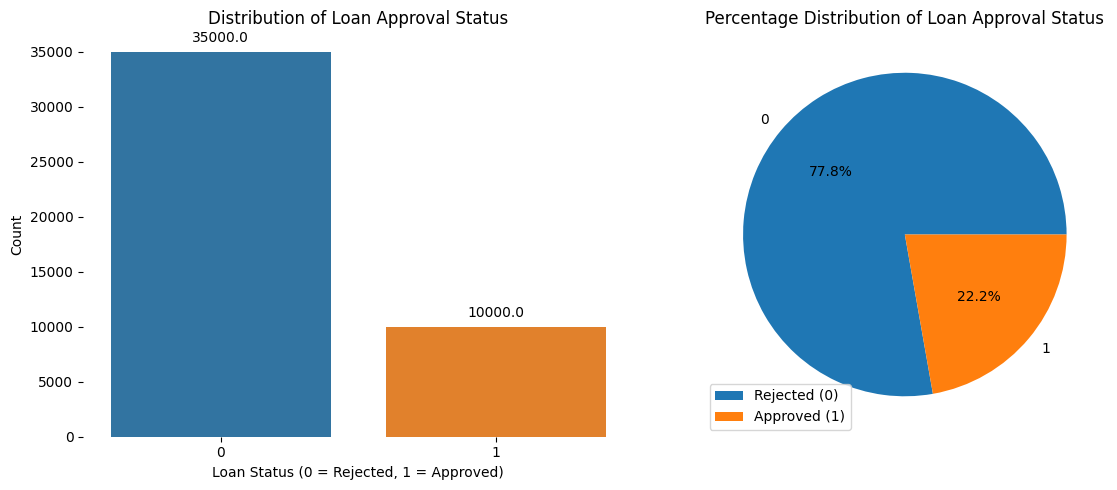

In [8]:
# Create subplots for loan status visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Count the occurrences of each loan status
loan_status_counts = df['loan_status'].value_counts()

# Bar plot for loan status distribution
sns.barplot(x=loan_status_counts.index, y=loan_status_counts, ax=axes[0], palette='tab10')
axes[0].set_title('Distribution of Loan Approval Status')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Loan Status (0 = Rejected, 1 = Approved)')

# Annotate bar plot with counts
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', 
                     xytext=(0, 10), textcoords='offset points')

sns.despine(left=True, bottom=True)

# Pie chart for percentage distribution of loan status
loan_status_percentage = loan_status_counts / loan_status_counts.sum() * 100
axes[1].pie(loan_status_percentage, labels=loan_status_percentage.index, autopct='%1.1f%%', 
            colors=sns.color_palette('tab10'))
axes[1].set_title('Percentage Distribution of Loan Approval Status')
plt.legend(['Rejected (0)', 'Approved (1)'])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### The insights from the loan status distribution visualization:

The count annotations on top of each bar provide a clear view of the actual number of records in each category, highlighting any imbalance in the dataset.
This visualization suggests a higher count of rejected loans compared to approved ones, which may indicate a class imbalance that should be addressed when building predictive models.
The pie chart illustrates the percentage distribution of loan approval status, offering a complementary view of the relative proportions of approvals and rejections.

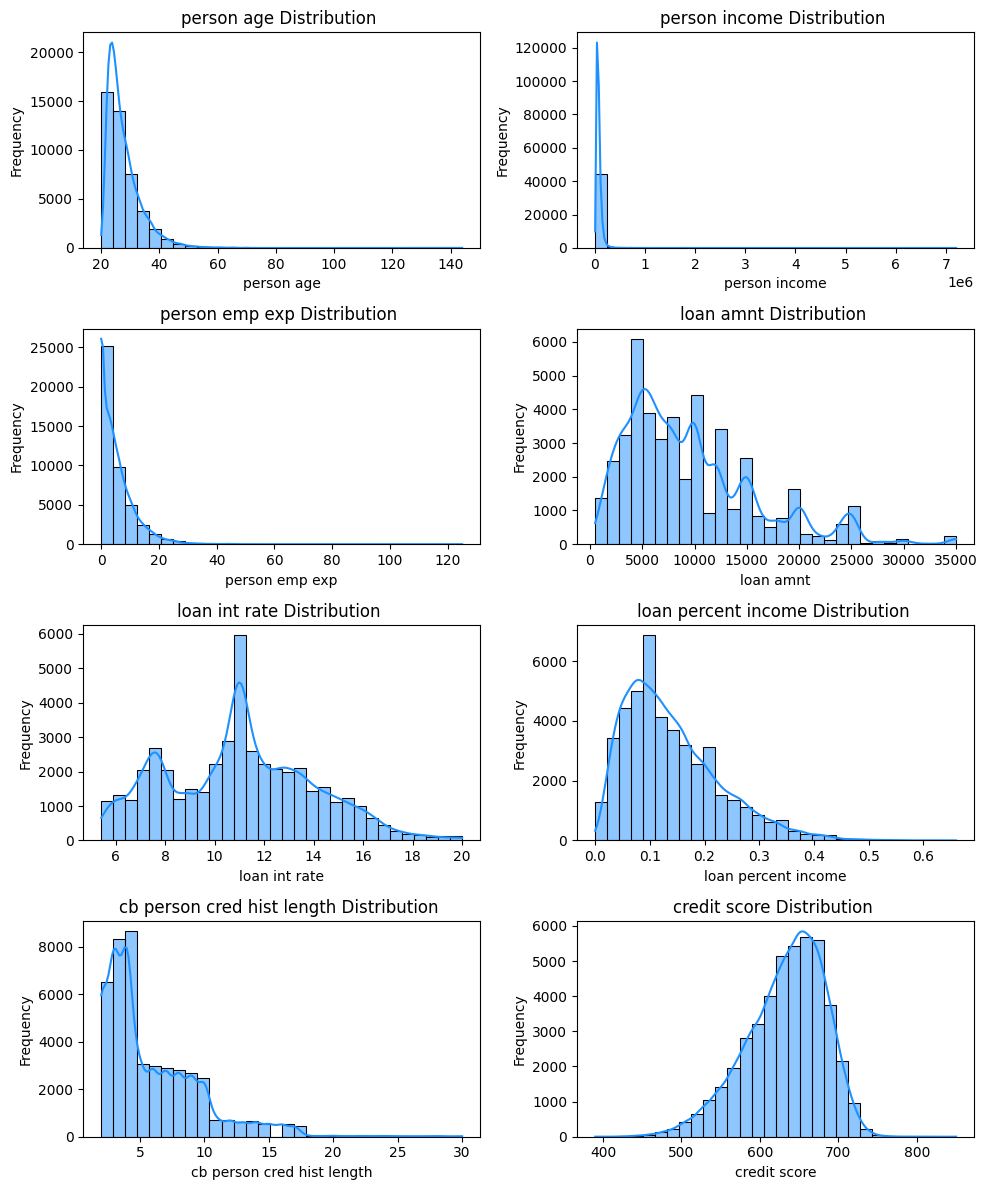

In [9]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(10, 12))  
    
    for i, column in enumerate(columns, 1):
        plt.subplot(4, 2, i)  
        sns.histplot(data[column], kde=True, bins=30, color='dodgerblue')
        plt.title(f'{column.replace("_", " ")} Distribution ')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

univariate_analysis(df, columns_to_analyze)

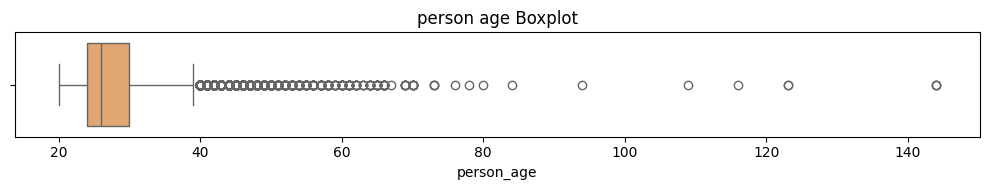


Summary Statistics for person age:
 count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64


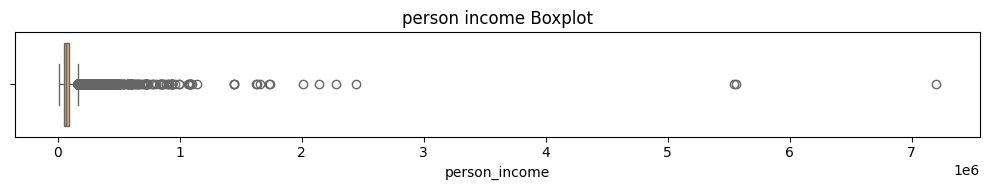


Summary Statistics for person income:
 count    4.500000e+04
mean     8.031905e+04
std      8.042250e+04
min      8.000000e+03
25%      4.720400e+04
50%      6.704800e+04
75%      9.578925e+04
max      7.200766e+06
Name: person_income, dtype: float64


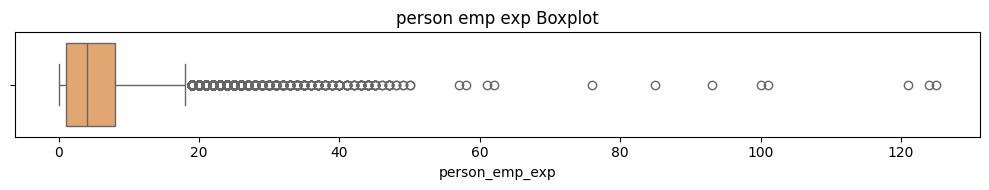


Summary Statistics for person emp exp:
 count    45000.000000
mean         5.410333
std          6.063532
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        125.000000
Name: person_emp_exp, dtype: float64


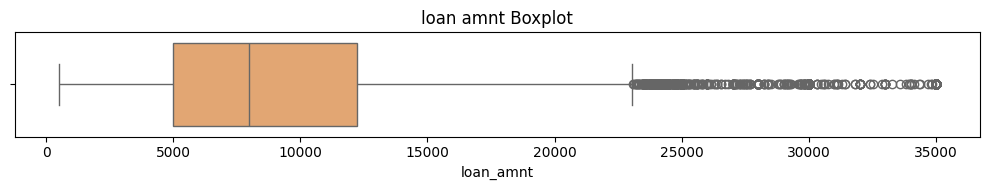


Summary Statistics for loan amnt:
 count    45000.000000
mean      9583.157556
std       6314.886691
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12237.250000
max      35000.000000
Name: loan_amnt, dtype: float64


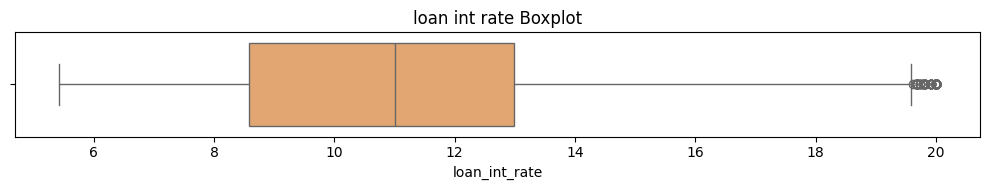


Summary Statistics for loan int rate:
 count    45000.000000
mean        11.006606
std          2.978808
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64


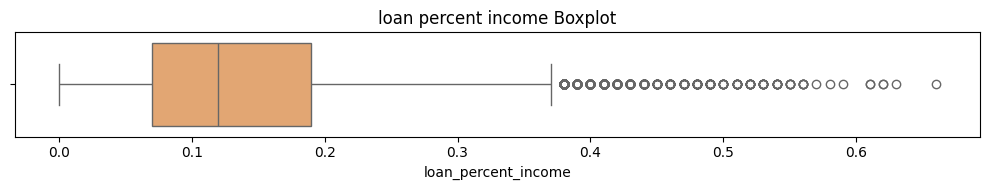


Summary Statistics for loan percent income:
 count    45000.000000
mean         0.139725
std          0.087212
min          0.000000
25%          0.070000
50%          0.120000
75%          0.190000
max          0.660000
Name: loan_percent_income, dtype: float64


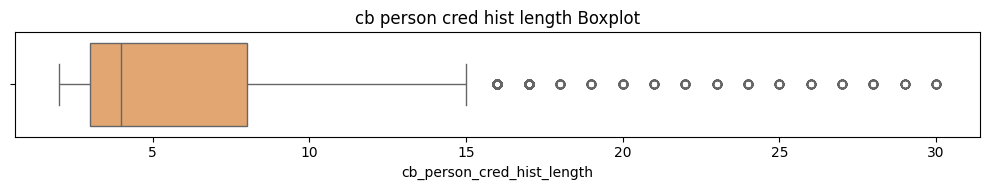


Summary Statistics for cb person cred hist length:
 count    45000.000000
mean         5.867489
std          3.879702
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64


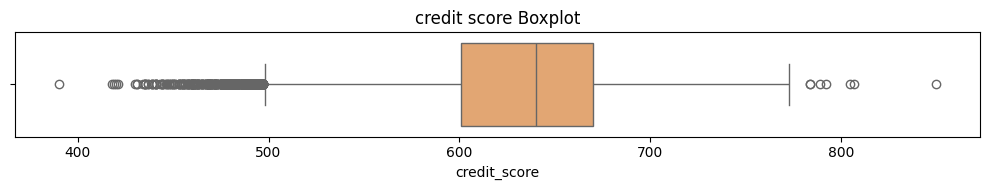


Summary Statistics for credit score:
 count    45000.000000
mean       632.608756
std         50.435865
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        850.000000
Name: credit_score, dtype: float64


In [10]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    sns.boxplot(x=data[column], color='sandybrown')
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

In [11]:
def plot_categorical_distribution(column_name, data=df):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=df, palette='muted')  
    plt.title(f'Distribution of {column_name}')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    sns.despine(left=True, bottom=True)
    
    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*df[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()

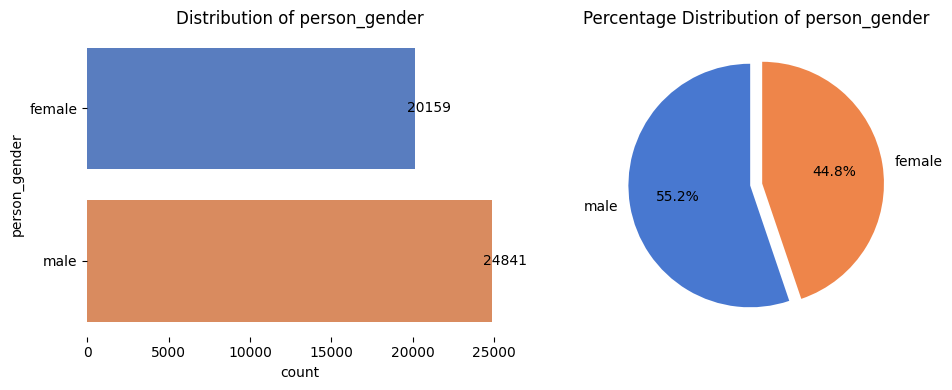

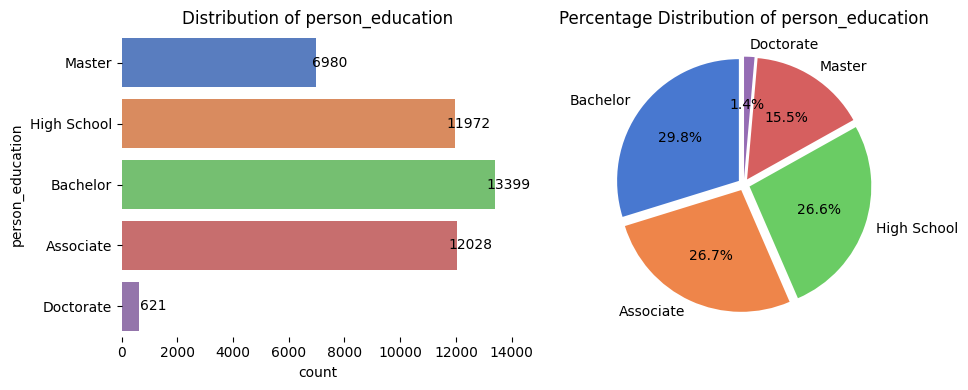

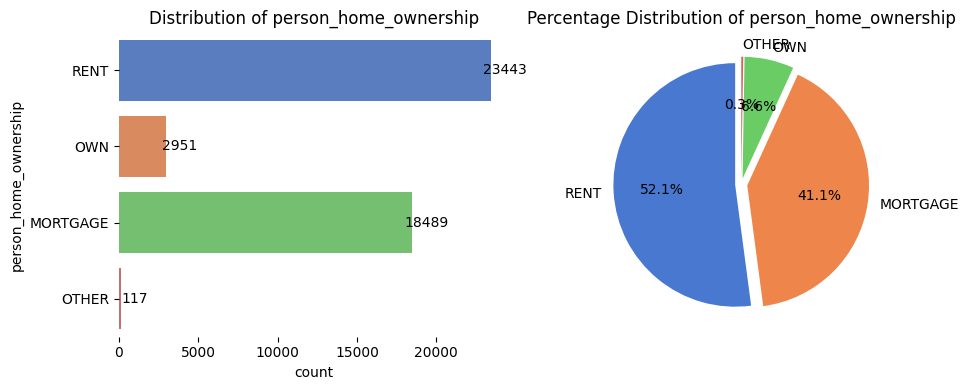

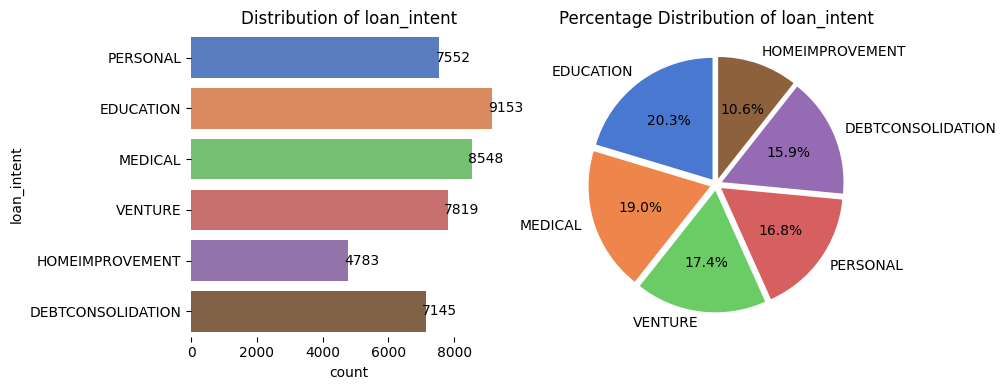

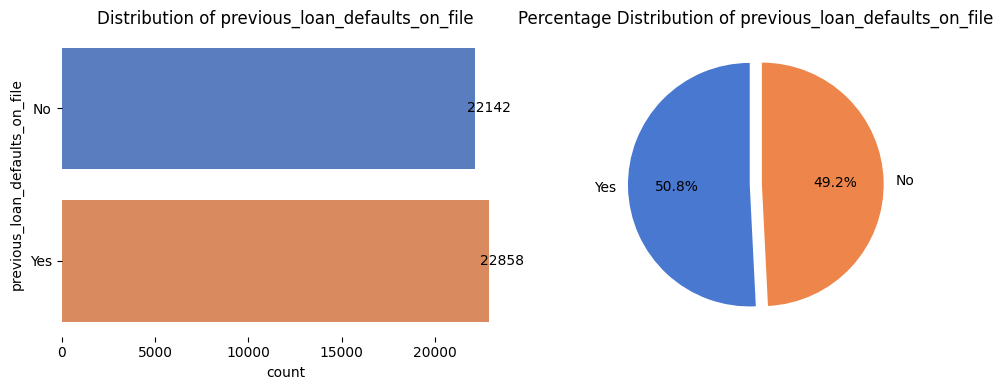

In [12]:
plot_categorical_distribution('person_gender')
plot_categorical_distribution('person_education')
plot_categorical_distribution('person_home_ownership')
plot_categorical_distribution('loan_intent')
plot_categorical_distribution('previous_loan_defaults_on_file')

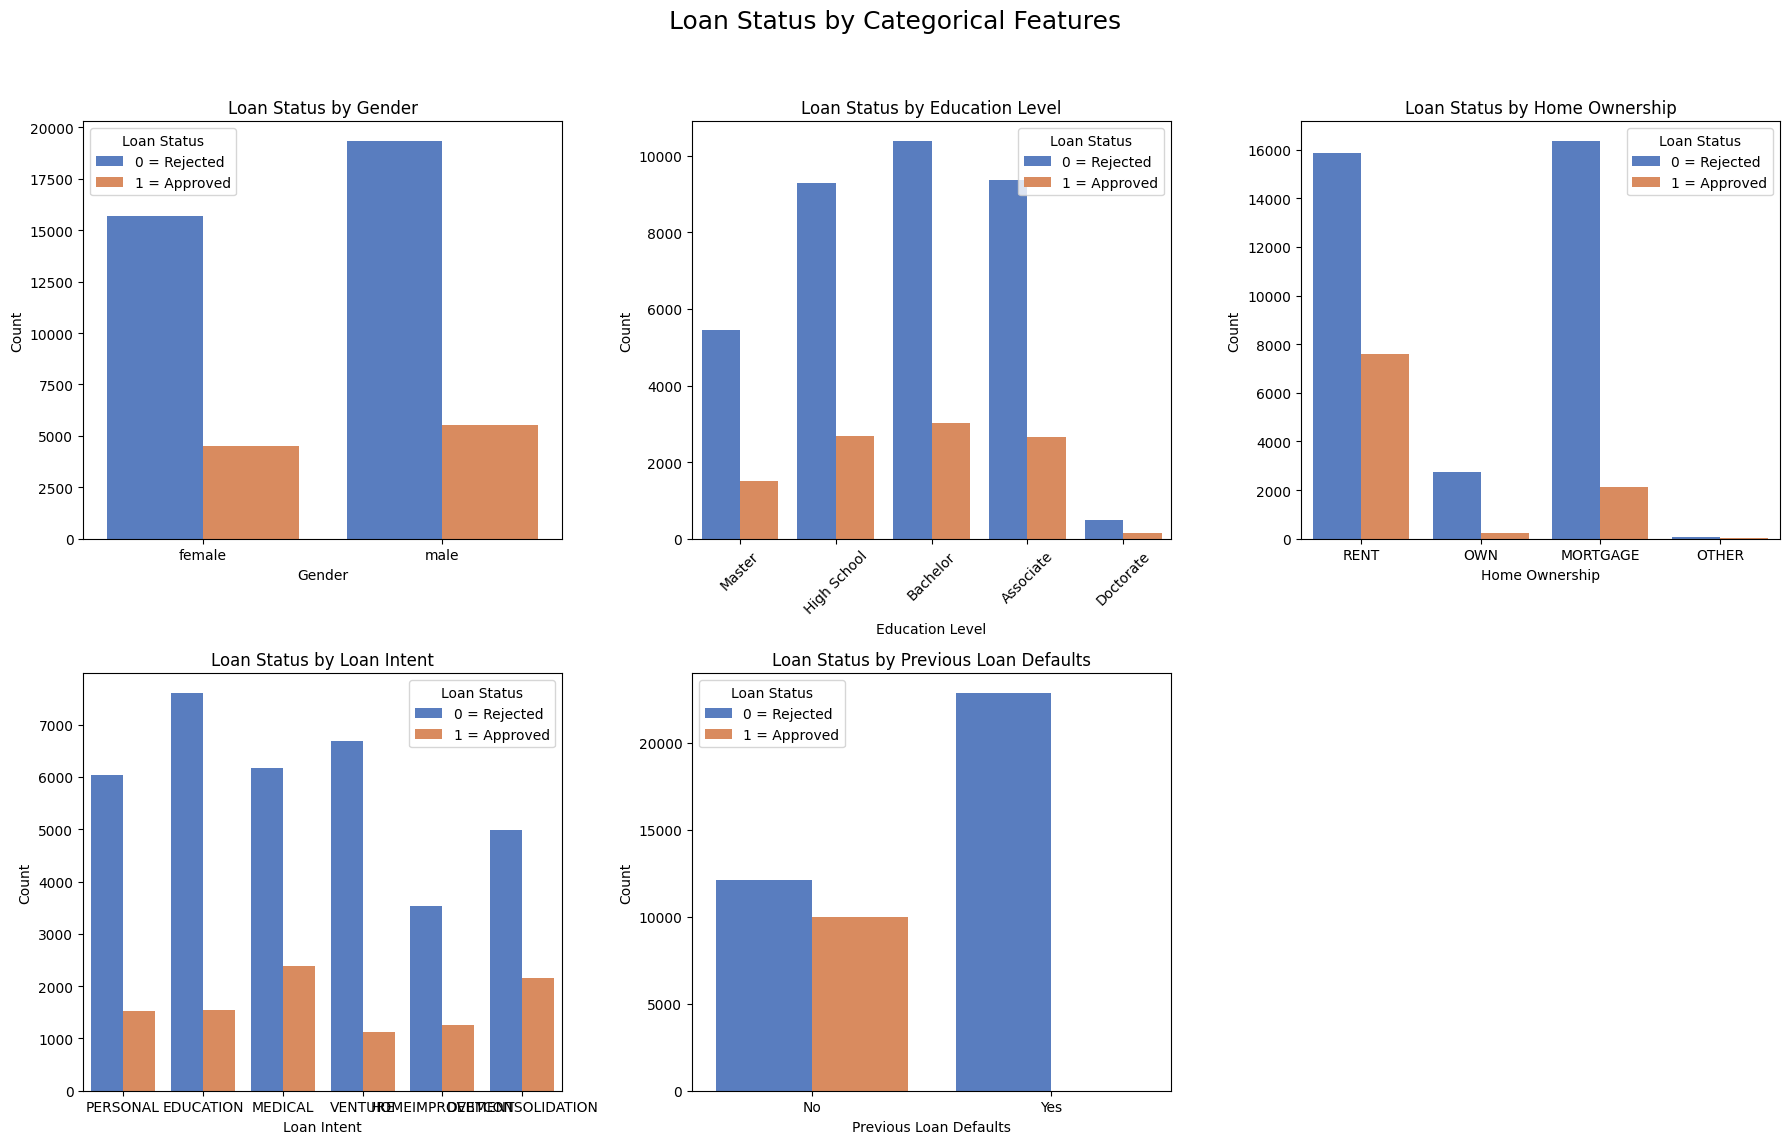

In [13]:
# Create subplots for loan status by categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Loan Status by Categorical Features", fontsize=18)

# Visualization for person_gender vs loan_status
sns.countplot(data=df, x='person_gender', hue='loan_status', ax=axes[0, 0], palette='muted')
axes[0, 0].set_title("Loan Status by Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Visualization for person_education vs loan_status
sns.countplot(data=df, x='person_education', hue='loan_status', ax=axes[0, 1], palette='muted')
axes[0, 1].set_title("Loan Status by Education Level")
axes[0, 1].set_xlabel("Education Level")
axes[0, 1].set_ylabel("Count")
axes[0, 1].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])
axes[0, 1].tick_params(axis='x', rotation=45)

# Visualization for person_home_ownership vs loan_status
sns.countplot(data=df, x='person_home_ownership', hue='loan_status', ax=axes[0, 2], palette='muted')
axes[0, 2].set_title("Loan Status by Home Ownership")
axes[0, 2].set_xlabel("Home Ownership")
axes[0, 2].set_ylabel("Count")
axes[0, 2].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Visualization for loan_intent vs loan_status
sns.countplot(data=df, x='loan_intent', hue='loan_status', ax=axes[1, 0], palette='muted')
axes[1, 0].set_title("Loan Status by Loan Intent")
axes[1, 0].set_xlabel("Loan Intent")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Visualization for previous_loan_defaults_on_file vs loan_status
sns.countplot(data=df, x='previous_loan_defaults_on_file', hue='loan_status', ax=axes[1, 1], palette='muted')
axes[1, 1].set_title("Loan Status by Previous Loan Defaults")
axes[1, 1].set_xlabel("Previous Loan Defaults")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Hide the last subplot (if not needed)
fig.delaxes(axes[1][2])

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

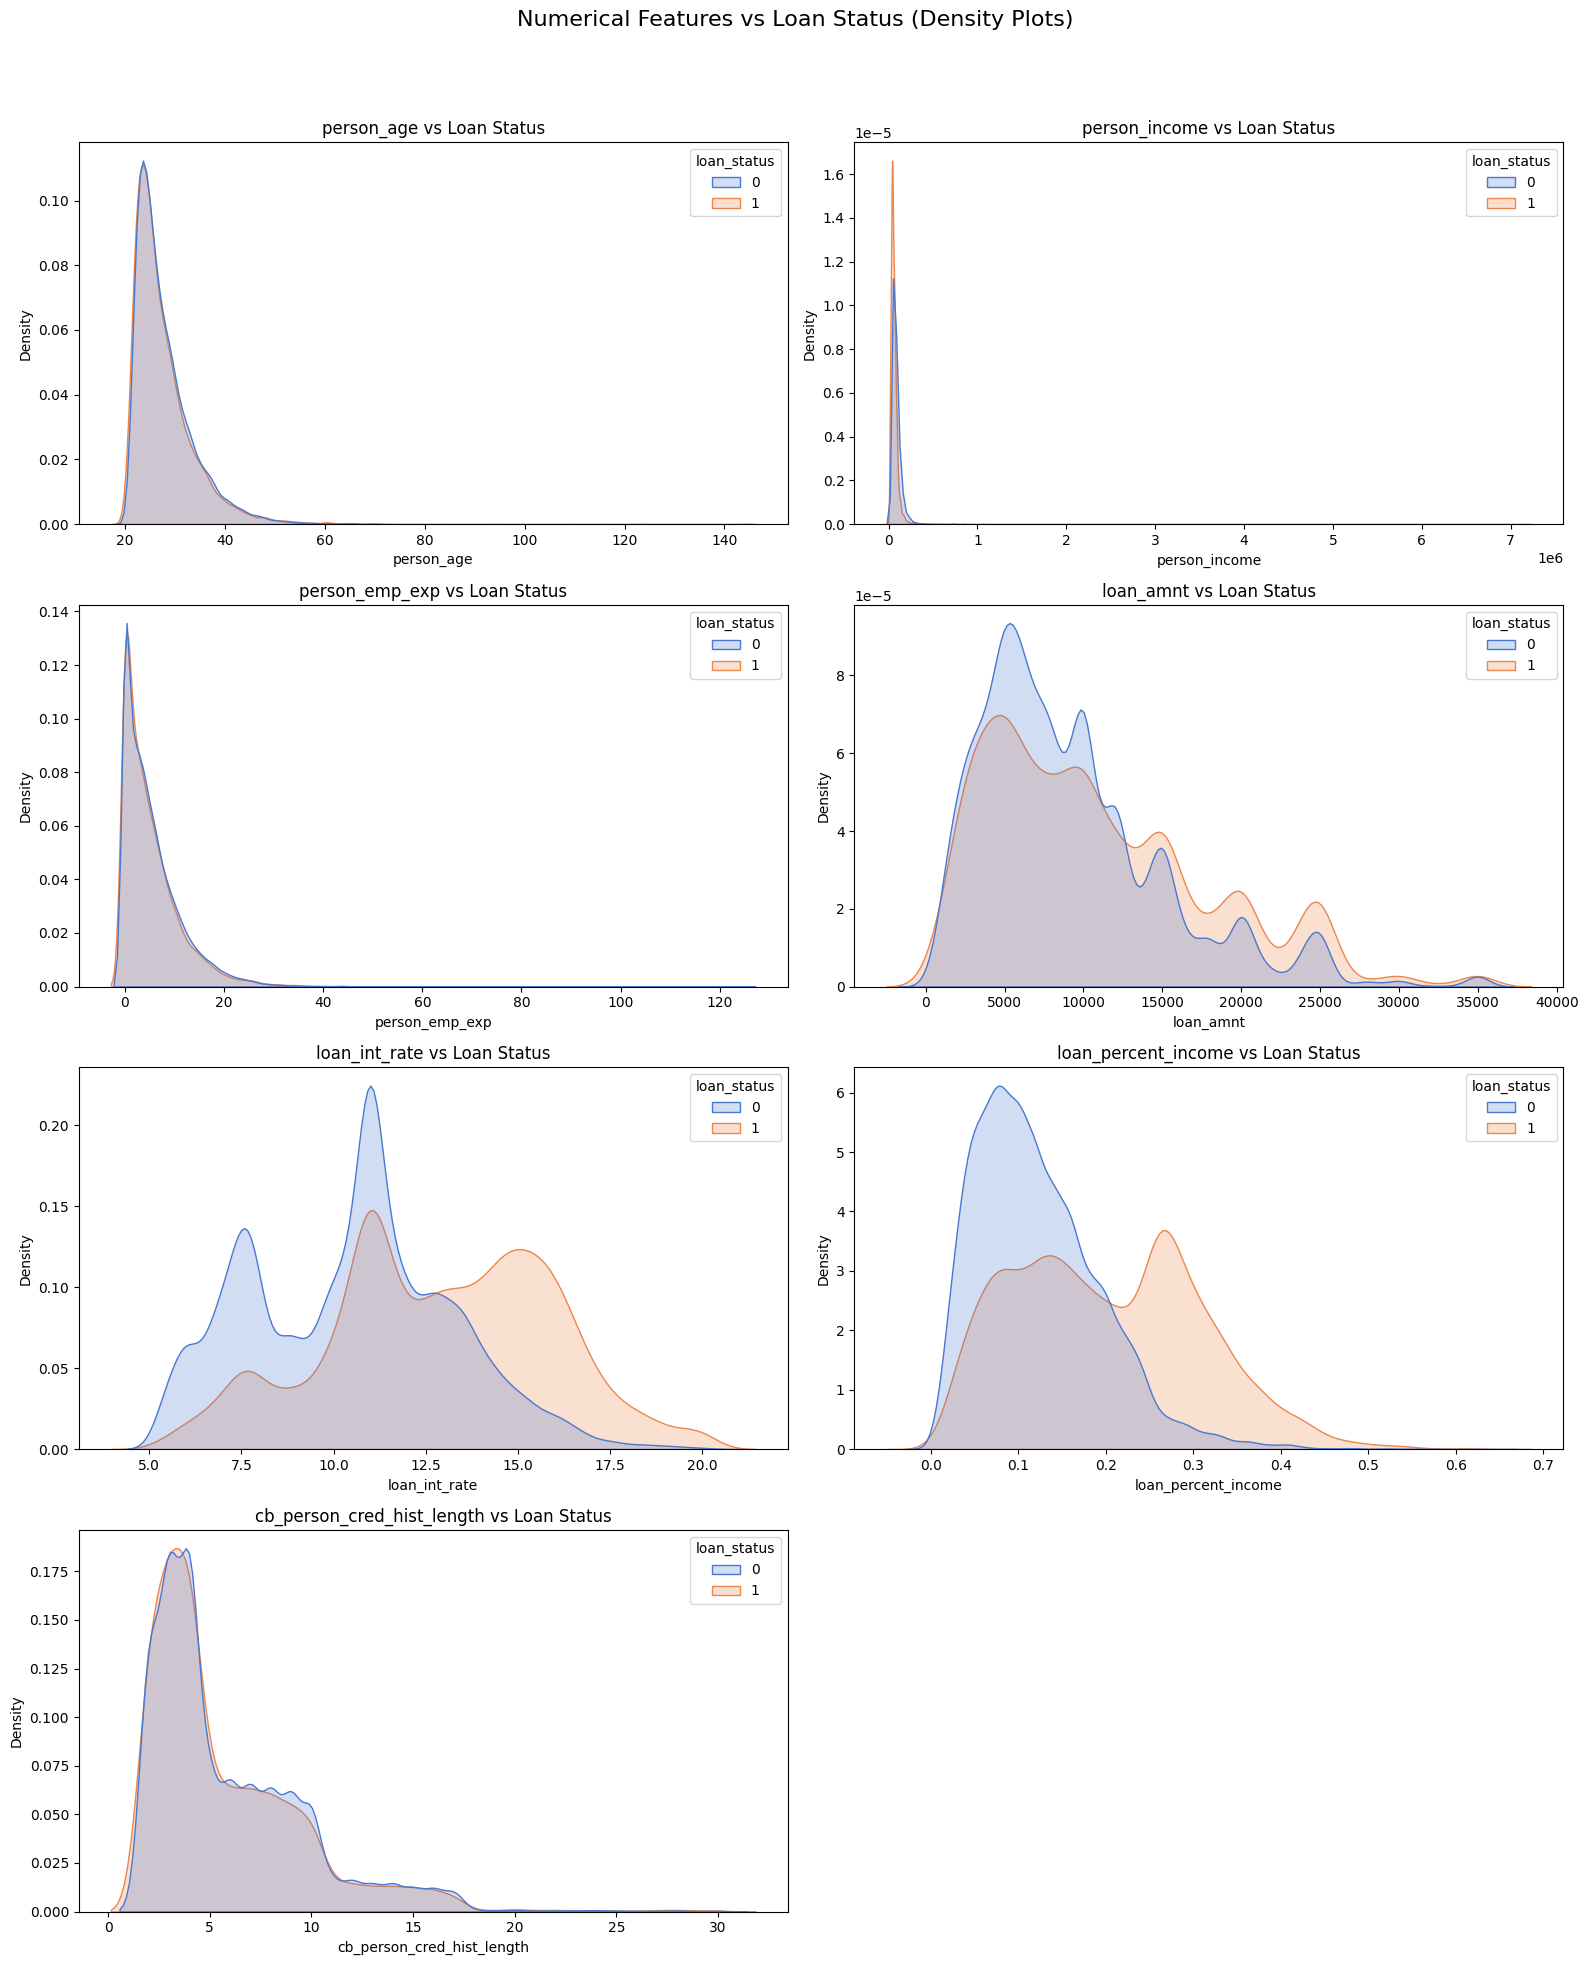

In [14]:
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Numerical Features vs Loan Status (Density Plots)', fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=col, hue='loan_status', ax=axes[i//2, i%2], fill=True, common_norm=False, palette='muted')
    axes[i//2, i%2].set_title(f'{col} vs Loan Status')
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Density')

fig.delaxes(axes[3, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

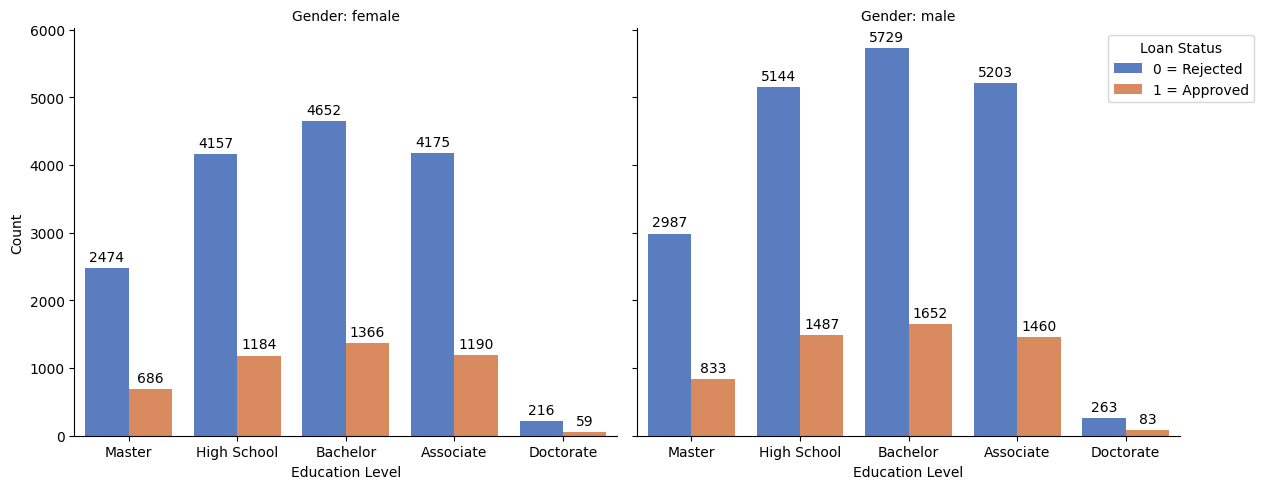

In [15]:
# Create the catplot for person_education vs loan_status by person_gender
g = sns.catplot(
    data=df,
    x='person_education', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

# Set axis labels and titles
g.set_axis_labels("Education Level", "Count")
g.set_titles("Gender: {col_name}")

# Annotate bars with counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Add legend for loan status
plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['0 = Rejected', '1 = Approved'],
    bbox_to_anchor=(1.15, 1)
)

# Show the plot
plt.show()

### Gender Comparison:

-  Both male and female applicants show similar trends in loan approval and rejection rates across education levels, though there may be slight variations.
* Education Level and Loan Status:

- For both genders, applicants with higher education levels (e.g., Bachelor's, Master's) tend to have higher loan approval counts.
Applicants with only a high school education appear to have more rejections than approvals, indicating that education level might influence loan outcomes, likely due to its association with income stability.
* Approval Pattern by Gender:

- Among both genders, there is a noticeable trend where more educated applicants (e.g., those with Master’s and Bachelor’s degrees) are more likely to get approved, which suggests that education level is a positive indicator for loan approval, possibly reflecting a more stable financial profile.
Rejected Applications:

- The rejection rate is higher for applicants with lower educational attainment, which might point to a perceived higher risk by lenders.
These patterns suggest that education level is an influential factor in loan approval decisions, and it interacts similarly across both genders.

## Data Preprocessing

In [16]:
# Binary Encoding for person_gender
df['person_gender'] = df['person_gender'].map({'female': 0, 'male': 1})
# Binary Encoding for previous_loan_defaults_on_file
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})

# Ordinal Encoding for person_education (if applicable)
education_order = {'High School': 1, 'Associate': 2, 'Bachelor': 3, 
                   'Master': 4, 'Doctorate': 5}
df['person_education'] = df['person_education'].map(education_order)

# One-Hot Encoding for person_home_ownership and loan_intent
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)


# Display the transformed DataFrame
print(df.head()) 

   person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0                 4        71948.0               0   
1        21.0              0                 1        12282.0               0   
2        25.0              0                 1        12438.0               3   
3        23.0              0                 3        79753.0               0   
4        24.0              1                 4        66135.0               1   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0    35000.0          16.02                 0.49                         3.0   
1     1000.0          11.14                 0.08                         2.0   
2     5500.0          12.87                 0.44                         3.0   
3    35000.0          15.23                 0.44                         2.0   
4    35000.0          14.27                 0.53                         4.0   

   credit_score  previous_loan_d

* The transformation applied to the dataset:

1. Binary Encoding:

person_gender is now represented as 0 (female) and 1 (male).
previous_loan_defaults_on_file is represented as 0 (No) and 1 (Yes).

2. Ordinal Encoding:

person_education has been mapped based on the level of education, with higher values indicating higher educational attainment (e.g., High School = 1, Doctorate = 5).

3. One-Hot Encoding:

New columns have been created for person_home_ownership and loan_intent, each representing a unique category (e.g., person_home_ownership_OWN, loan_intent_PERSONAL), with one category dropped to avoid multicollsformations.

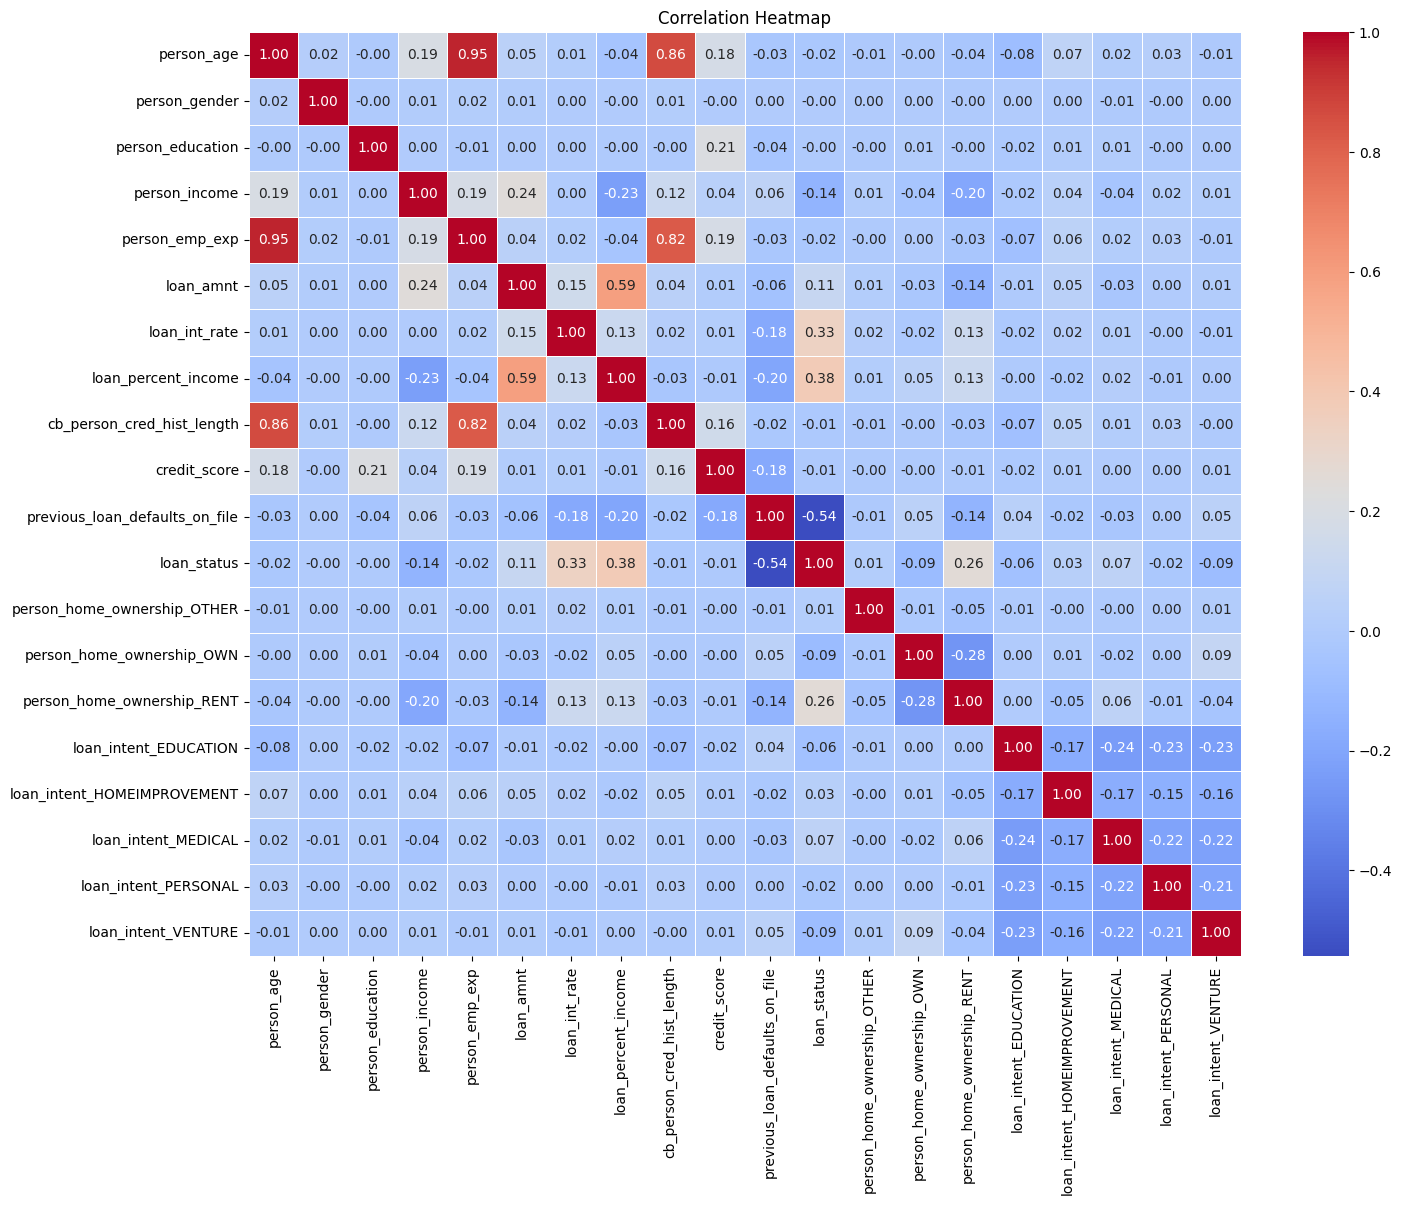

In [17]:
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

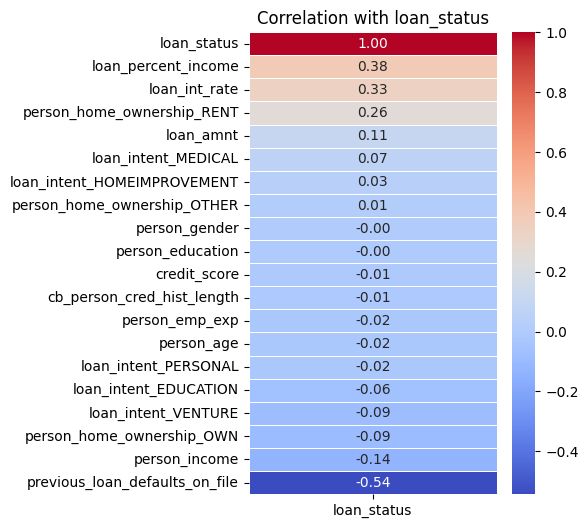

In [18]:
# Extract correlation values with respect to the target variable (loan_status)
target_variable = 'loan_status'
target_corr = corr_matrix[[target_variable]].sort_values(by=target_variable, ascending=False)

# Plotting the heatmap for correlation values with respect to the target variable
plt.figure(figsize=(4, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Correlation with {target_variable}')
plt.show()

- The strongest predictors for loan approval appear to be loan percent income, loan interest rate, and previous loan defaults.
- Credit score, surprisingly, has a near-zero correlation (-0.007), suggesting it may not play a major role in approval within this dataset, or it may interact in complex ways wiroceed with modeling!

## Model Training and Evaluation

In [19]:
# Separate features and target from the train dataset
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

# Display the transformed data
display(X.head())
display(y.head())

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,0,False,False,True,False,False,False,True,False
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,1,False,True,False,True,False,False,False,False
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,0,False,False,False,False,False,True,False,False
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,0,False,False,True,False,False,True,False,False
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,0,False,False,True,False,False,True,False,False


0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [20]:
# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Use RobustScaler 
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [22]:
import joblib

# Replace `scaler` with the name of your scaler object
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")


Scaler saved to scaler.pkl


In [23]:
# Dictionary to store the models and their names
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(verbosity=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.77      0.74      0.76      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.89      0.89      0.89      9000



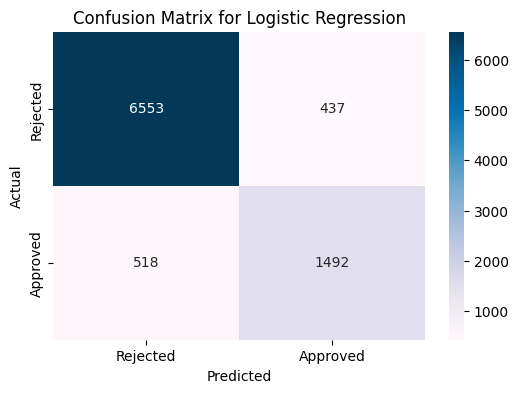



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6990
           1       0.90      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



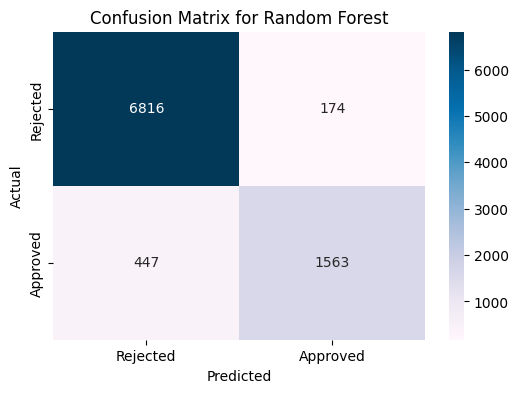



Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



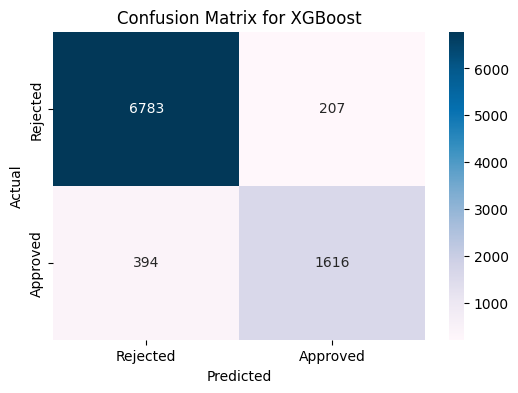



Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.88      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



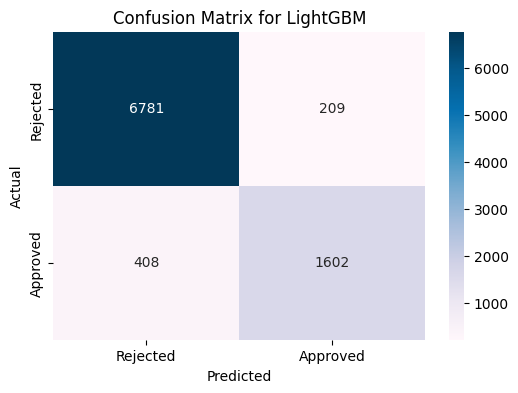



Classification Report for CatBoost:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



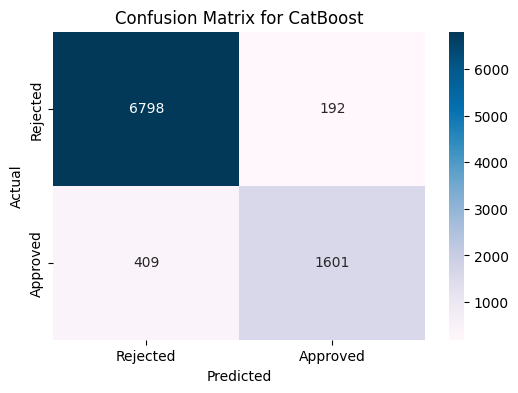



Model Performance Table:


,Model,Train Score,Test Score,Accuracy Score
0,Logistic Regression,0.897139,0.893889,0.893889
1,Random Forest,1.000000,0.931000,0.931000
2,XGBoost,0.967028,0.933222,0.933222
3,LightGBM,0.947361,0.931444,0.931444
4,CatBoost,0.954611,0.933222,0.933222


In [24]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions on validation set
    y_val_pred = model.predict(X_val)
    
    # Train and Test Scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_val, y_val)
    
    # Accuracy Score
    accuracy = accuracy_score(y_val, y_val_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy
    })
    
    # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_val, y_val_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("\n" + "="*60 + "\n")

results_df = pd.DataFrame(results)

# Display the model performance table
print("Model Performance Table:")
display(results_df)

- Logistic Regression: Moderate performance, likely due to its linear nature, which may not fully capture the complex relationships in the data.
- Random Forest, XGBoost, LightGBM, and CatBoost: These models performed strongly, achieving high accuracy scores (around 0.93). Ensemble models (Random Forest, XGBoost, LightGBM, CatBoost) generally perform well on structured data, benefiting from the ability to capture non-linear relationships.
- Best Model: XGBoost achieved the highest accuracy of 0.9346, making it the preferred choice for this task.

In [25]:
# Identify the best model by accuracy
best_model_row = results_df.loc[results_df['Accuracy Score'].idxmax()]
best_model_name = best_model_row['Model']
best_model_accuracy = best_model_row['Accuracy Score']

print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")


Best Model: XGBoost with Accuracy: 0.9332


In [27]:
import joblib

# Enregistrer chaque modèle dans un fichier
for name, model in models.items():
    file_name = f"{name.replace(' ', '_')}_model.pkl"
    joblib.dump(model, file_name)
    print(f"Model {name} saved as {file_name}")


Model Logistic Regression saved as Logistic_Regression_model.pkl
Model Random Forest saved as Random_Forest_model.pkl
Model XGBoost saved as XGBoost_model.pkl
Model LightGBM saved as LightGBM_model.pkl
Model CatBoost saved as CatBoost_model.pkl
